## Plot shapefile data on to a scatter plot using PySAL & Pandas

In [ ]:
%matplotlib inline

In [ ]:
import pysal as ps
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

#### Use pysal to open .dbf of shapefile

In [ ]:
dbf_file = ps.open('/home/paul/Downloads/fish_layers/tstation.dbf')

#### Read all columns one by one to a dictionary

In [ ]:
data_dict = {col: dbf_file.by_col(col) for col in dbf_file.header}

In [ ]:
df = pd.DataFrame(data_dict)

#### Define x & y axis data 

In [ ]:
x = df['dist_doors']
y = (df['max_gdepth']+df['min_gdepth'])/2

####Use SciPy's linegress to draw regression line

In [ ]:
slope, intercept, r_value, p_value, std_err  = linregress(x,y)
print slope
print intercept
print r_value
print p_value
print std_err 

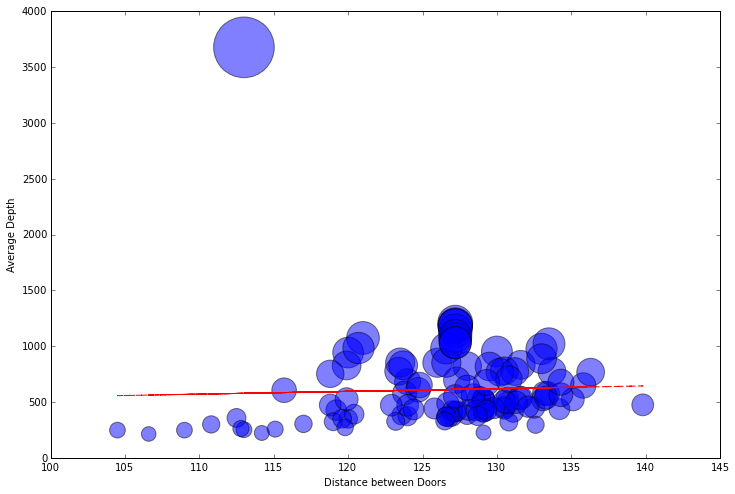

In [17]:
f = plt.figure(figsize=(12,8))
plt.scatter(x, y, s=y, alpha=0.5)
predict_y = intercept + slope * x
plt.plot(x, predict_y, 'k--', color= 'red')
plt.xlabel('Distance between Doors')
plt.ylabel('Average Depth')
plt.show()